In [9]:
import pandas as pd

customers = pd.read_csv('C:/Users/sures/Downloads/Customers.csv')
transactions = pd.read_csv('C:/Users/sures/Downloads/Transactions.csv')

In [10]:
data = pd.merge(transactions, customers, on='CustomerID')

In [11]:
data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,William Walker,South America,2023-03-04
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,William Walker,South America,2023-03-04
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,Amber Gonzalez,South America,2024-11-22
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,Julia Palmer,Asia,2024-11-13


In [12]:
customer_summary = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()
customer_summary.columns = ['CustomerID', 'TotalSpent', 'TransactionCount']

In [13]:
customer_summary

,CustomerID,TotalSpent,TransactionCount
0,C0001,3354.52,5
1,C0002,1862.74,4
2,C0003,2725.38,4
3,C0004,5354.88,8
4,C0005,2034.24,3
...,...,...,...
194,C0196,4982.88,4
195,C0197,1928.65,3
196,C0198,931.83,2
197,C0199,1979.28,4


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary[['TotalSpent', 'TransactionCount']])

In [17]:
scaled_features

array([[-0.06170143, -0.01145819],
       [-0.87774353, -0.46749414],
       [-0.40585722, -0.46749414],
       [ 1.03254704,  1.35664965],
       [-0.78392861, -0.92353008],
       [ 0.41587942, -0.46749414],
       [-0.48548229, -0.92353008],
       [ 0.43997044,  2.26872154],
       [-1.40630171, -0.92353008],
       [-0.9571662 , -0.46749414],
       [ 0.14369581, -0.01145819],
       [ 0.96492372,  0.9006137 ],
       [ 1.38575064,  0.9006137 ],
       [-1.72239508, -1.83560198],
       [-1.26353893, -1.37956603],
       [ 0.22269727, -0.01145819],
       [ 0.70375173,  1.35664965],
       [ 0.71908486, -0.01145819],
       [-0.70101045,  0.44457776],
       [-1.39212827, -1.83560198],
       [ 1.0681256 ,  1.35664965],
       [ 0.64973294,  0.44457776],
       [ 0.92520418,  0.44457776],
       [ 0.08736309,  0.9006137 ],
       [-1.02704328, -0.46749414],
       [ 0.04471149, -0.46749414],
       [-0.49471609, -0.46749414],
       [ 1.83377022,  1.35664965],
       [-0.9197934 ,

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)  # Choose an appropriate number of clusters
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

In [18]:
customer_summary

,CustomerID,TotalSpent,TransactionCount,Cluster
0,C0001,3354.52,5,2
1,C0002,1862.74,4,1
2,C0003,2725.38,4,1
3,C0004,5354.88,8,0
4,C0005,2034.24,3,1
...,...,...,...,...
194,C0196,4982.88,4,2
195,C0197,1928.65,3,1
196,C0198,931.83,2,3
197,C0199,1979.28,4,1


In [16]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])

In [19]:
db_index

0.800097490790173

In [20]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, customer_summary['Cluster'])

In [21]:
silhouette_avg

0.39908151694114

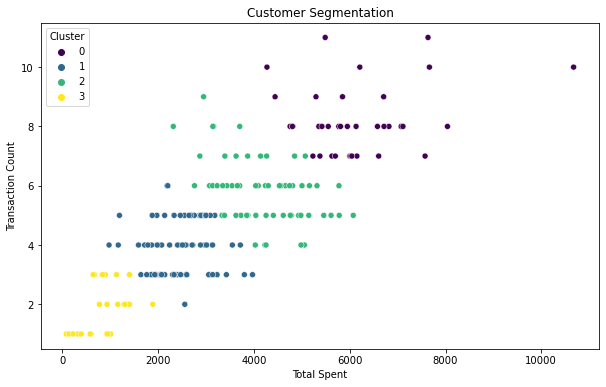

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_summary['TotalSpent'], y=customer_summary['TransactionCount'], hue=customer_summary['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spent')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.show()
